# Proyecto 1


### Deep Learning y Redes Neuronales 


#### Universidad de los Andes - Integrantes:


Ángela Arias - Cod: *201728551*

Saby Espinel - Cod: *201215868*

Diego Salazar - Cod: *201628925*

Raúl Pardo - Cod: *201727367*

# Proyecto Kaggle (Recruitment)
### ALLSTATE CLAIMS SEVERITY

Fuente de la competencia escogida:
https://www.kaggle.com/c/allstate-claims-severity

# Descripción del Proyecto

**ALLSTATE** es una aseguradora estadounidense que desea desarrollar métodos automáticos para predecir el costo, y por lo tanto la severidad, de los reclamos.

El objetivo es desarrollar un algoritmo que realice de manera precisa predicciones sobre la severidad de los reclamos.

El concurso proporciona los datos para trabajar, pero no brinda una descripción de las variables ni el significado de la codificación de las variables categóricas.

## Lectura y preparación de los datos

Para el inicio del proyecto, importamos las librerias que nos permitirán realizar el procesamiento de los datos

In [1]:
import os # Ubicacion de las carpetas
import pandas 
import numpy
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
#Ubicacion en carpetas

## Raul y Angela
#os.chdir("C:\AAndrés\Maestría Analytics\Semestre Vacaciones\Deep Learning\Proyecto 1\ALLSTATE CLAIMS SEVERITY\Archivos Diego")

## Diego y Saby
#os.chdir("C:/Users/da.salazarb/Google Drive (dasalazarb@unal.edu.co)/AppliedDeepLearningClass-master/01 kaggle")
os.chdir("C:/Users/dsala/Google Drive (dasalazarb@unal.edu.co)/AppliedDeepLearningClass-master/01 kaggle")

Realizamos la lectura de los archivos .csv de train y test.

In [3]:
import warnings
warnings.filterwarnings('ignore')
dataset = pandas.read_csv("train.csv", sep=";")
dataset_test = pandas.read_csv("test.csv", sep=";")
ID = dataset_test['id']

pandas.set_option('display.max_rows', None)
pandas.set_option('display.max_columns', None)

Eliminamos la primera variable que corresponde a la identificación y por lo tanto no hace parte del modelo.

In [4]:
dataset = dataset.iloc[:,1:]

Aqui una vision del contenido de las variables

In [5]:
dataset.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,A,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,B,D,B,D,C,B,B,B,A,A,A,A,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,D,B,B,D,D,D,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,C,B,B,C,A,A,A,B,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


Verificamos los NAs mediante la suma de todos en el data.frame

In [6]:
print("Total de NAs en el conjunto de datos: " + str(dataset.isnull().sum().sum())) #La base de datos no contiene missing values.

Total de NAs en el conjunto de datos: 0


Tamaño de los datos de train

In [7]:
dataset.shape # 188318 filas y 131 columnas

(188318, 131)

Dos tipos de variables continuas (tipo: **float64**) y categoricas (tipo: **object**)

In [8]:
print(dataset.iloc[:,1:10].dtypes)
print(dataset.iloc[:,116:126].dtypes)

cat2     object
cat3     object
cat4     object
cat5     object
cat6     object
cat7     object
cat8     object
cat9     object
cat10    object
dtype: object
cont1     float64
cont2     float64
cont3     float64
cont4     float64
cont5     float64
cont6     float64
cont7     float64
cont8     float64
cont9     float64
cont10    float64
dtype: object


Tenemos 131 variables, incluida la variable respuesta LOSS. En total son 116 variables categóricas y 15 continuas, incluida la variable dependiente LOSS.

In [9]:
### Estadísticas básicas de las variables continuas.
dataset.describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


Como podemos ver los valores ya se encuentran **normalizados** y no deben ser procesados. <br>
Visualmente los datos muestran comportamientos similares.

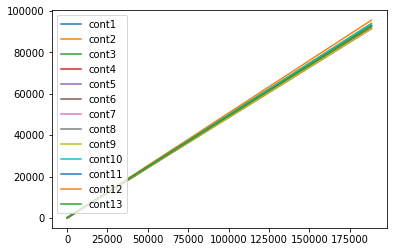

In [10]:
df = pandas.DataFrame(dataset.iloc[:,116:129], index=dataset.iloc[:,116:129].index)

df = df.cumsum()

plt.figure(); df.plot();

Adicional se indago sobre la correlacion entre los datos y la variable respuesta(**LOSS**)

In [11]:
from pandas.plotting import scatter_matrix

In [12]:
df = pandas.DataFrame(numpy.random.randn(1000, 5), columns=list(dataset.iloc[0:1000, 126:131].columns))

Aqui solo mostramos las ultimas variables. Pero en general tienen el mismo comportamiento con LOSS.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000166B17AC5F8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000166CA347860>]], dtype=object)

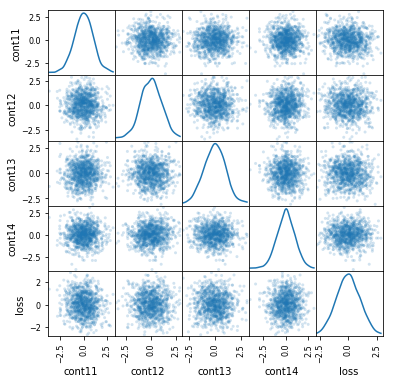

In [13]:
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

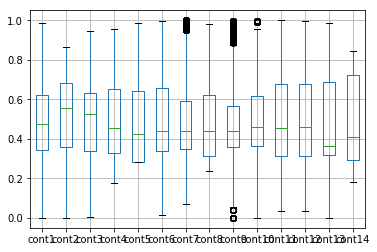

In [14]:
### Gráficas boxplot para visualizar algún tipo de outlier.
dataset.loc[:,'cont1':'cont14'].boxplot()

Encontramos que 3 de las 14 variables continuas presentan outliers o datos extremos. Dada la gran cantidad de observaciones disponibles y los pocos datos que están en los extremos, consideramos que es mejor dejar estas observaciones en el modelo.

Despues verificamos si existe algun tipo de variables con algun tipo de sesgo o curtosis.

In [15]:
dataset.iloc[:,117:131].skew()

cont2    -0.310941
cont3    -0.010002
cont4     0.416096
cont5     0.681622
cont6     0.461214
cont7     0.826053
cont8     0.676634
cont9     1.072429
cont10    0.355001
cont11    0.280821
cont12    0.291992
cont13    0.380742
cont14    0.248674
loss      3.794958
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000166B477F7F0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000166B4AC2080>]], dtype=object)

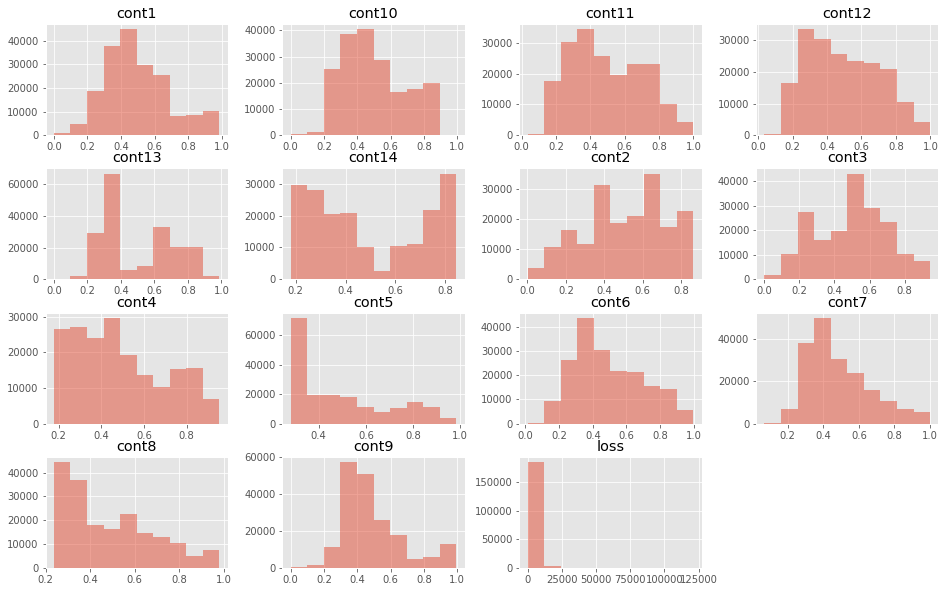

In [16]:
matplotlib.style.use('ggplot')

df = pandas.DataFrame(dataset.iloc[:,116:131],columns=dataset.iloc[:,116:131].columns)

df.hist(alpha=0.5, figsize=(16, 10))

En general, todas las variables continuas estan correlacionadas.y algunas de ellas tienen un sesgo a la izquierda como la variable **cont5**.

****************************************************************************************************************************************************************

Ahora miremos como concuerdan las distribuciones de algunas variables continuas con la distribucion de la variable respuesta **loss**.

In [59]:
import seaborn as sns
from scipy import stats

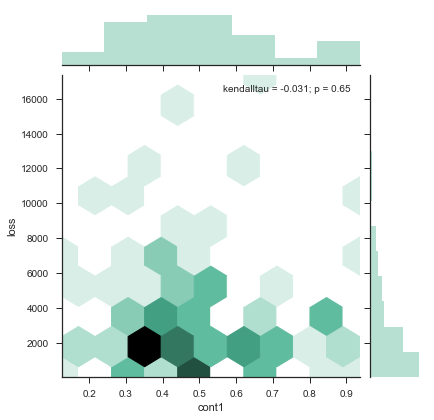

In [61]:
sns.set(style="ticks")

x = dataset.iloc[0:100,116]
y = dataset.iloc[0:100,130]

sns.jointplot(x, y, kind="hex", stat_func=stats.kendalltau, color="#4CB391")

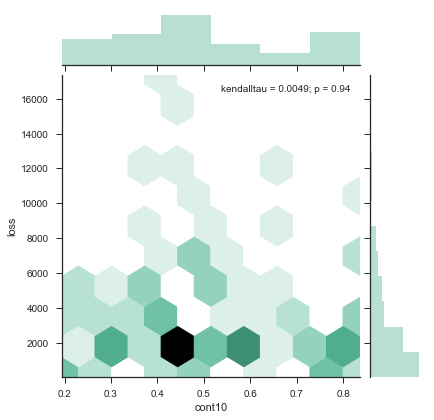

In [63]:
sns.set(style="ticks")

x = dataset.iloc[0:100,125]
y = dataset.iloc[0:100,130]

sns.jointplot(x, y, kind="hex", stat_func=stats.kendalltau, color="#4CB391")

En su mayoria los valores donde estan concentrados los valores de loss concuerdan con las medias de las distribuciones de cada una de las variables continuas.

****************************************************************************************************************************************************************

## Codificacion de las variables categoricas

Las variables categoricas se identificaron desde la 0 hasta la 116, segun vimos arriba.

In [21]:
# funcion get_dummies para codificar todo de manera sencilla
pandas.get_dummies(dataset.iloc[:,0:116].head(10), sparse=True)

,cat1_A,cat1_B,cat2_A,cat2_B,cat3_A,cat3_B,cat4_A,cat4_B,cat5_A,cat5_B,cat6_A,cat6_B,cat7_A,cat8_A,cat9_A,cat9_B,cat10_A,cat10_B,cat11_A,cat11_B,cat12_A,cat12_B,cat13_A,cat13_B,cat14_A,cat15_A,cat16_A,cat16_B,cat17_A,cat18_A,cat19_A,cat20_A,cat21_A,cat22_A,cat23_A,cat23_B,cat24_A,cat25_A,cat26_A,cat27_A,cat28_A,cat28_B,cat29_A,cat30_A,cat31_A,cat32_A,cat32_B,cat33_A,cat34_A,cat35_A,cat36_A,cat36_B,cat37_A,cat38_A,cat38_B,cat39_A,cat39_B,cat40_A,cat40_B,cat41_A,cat41_B,cat42_A,cat42_B,cat43_A,cat44_A,cat45_A,cat46_A,cat47_A,cat48_A,cat49_A,cat50_A,cat50_B,cat51_A,cat52_A,cat52_B,cat53_A,cat54_A,cat55_A,cat56_A,cat57_A,cat58_A,cat59_A,cat60_A,cat61_A,cat62_A,cat63_A,cat64_A,cat65_A,cat66_A,cat67_A,cat68_A,cat69_A,cat70_A,cat71_A,cat72_A,cat72_B,cat73_A,cat73_B,cat74_A,cat75_A,cat75_B,cat76_A,cat77_D,cat78_B,cat79_B,cat79_D,cat80_B,cat80_D,cat81_B,cat81_D,cat82_A,cat82_B,cat82_D,cat83_B,cat83_D,cat84_C,cat85_B,cat86_B,cat86_D,cat87_B,cat87_C,cat87_D,cat88_A,cat88_D,cat89_A,cat90_A,cat90_B,cat91_A,cat91_B,cat92_A,cat92_H,cat93_C,cat93_D,cat94_B,cat94_C,cat94_D,cat95_C,cat95_D,cat96_E,cat97_A,cat97_C,cat97_E,cat98_A,cat98_C,cat98_D,cat99_D,cat99_P,cat99_T,cat100_B,cat100_C,cat100_F,cat100_H,cat100_I,cat100_J,cat100_L,cat101_A,cat101_C,cat101_D,cat101_F,cat101_G,cat101_J,cat101_O,cat101_Q,cat102_A,cat103_A,cat103_B,cat103_C,cat103_F,cat104_D,cat104_E,cat104_H,cat104_I,cat104_K,cat105_E,cat105_F,cat105_H,cat106_F,cat106_G,cat106_H,cat106_I,cat106_K,cat107_F,cat107_G,cat107_I,cat107_J,cat107_K,cat107_M,cat108_A,cat108_B,cat108_G,cat108_K,cat109_AB,cat109_BI,cat109_BU,cat109_H,cat110_BC,cat110_C,cat110_CQ,cat110_CS,cat110_DK,cat110_DW,cat110_EB,cat111_A,cat111_C,cat111_G,cat112_AH,cat112_AS,cat112_AV,cat112_C,cat112_J,cat112_K,cat112_N,cat112_U,cat112_Y,cat113_AE,cat113_AF,cat113_AX,cat113_BM,cat113_S,cat113_Y,cat114_A,cat114_J,cat115_I,cat115_K,cat115_O,cat115_P,cat115_Q,cat116_CK,cat116_DJ,cat116_DP,cat116_GK,cat116_IE,cat116_LB,cat116_LO,cat116_LY
0,1,0,0,1,1,0,0,1,1,0,1,0,1,1,0,1,1,0,0,1,1,0,1,0,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1,1,1,1,1,0,0,1,0,1,0,1,0,0,1,1,1,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,1,0,0,1,1,0,1,0,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,0,1,1,1,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,1,1,0,1,0,0,1,1,0,1,1,0,1,0,1,0,1,0,1,0,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,0,1,1,1,0,1,1,1,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,0,1,1,1,1,0,1,0,0,1,0,1,0,0,1,1,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,1,1,0,0,1,1,0,1,0,1,1,0,1,1,0,1,0,1,0,1,0,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,1,1,1,0,0,1,0,1,0,0,1,1,0,1,1,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,1,0,0,1,1,0,0,1,1,0,1,0,1,1,0,1,0,1,1,0,0,1,1,0,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,0,1,0,1,0,1,0,1,0,1,1,1,1,

In [22]:
#Gracias a dtype sabemos que de la variable 0 hasta la 116 corresponden a las categoricas
split = 116
data=dataset.iloc[:,0:split]
data = pandas.get_dummies(data, sparse=True)

In [23]:
#tamaño de las variables categoricas codificadas por 1 y 0
data.shape # 188318 filas y 1139 columnas

(188318, 1139)

Ahora **concatenamos** los dos DataFrames para trabajar con esta base.

In [24]:
dataset_encoded = numpy.concatenate((data,dataset.iloc[:,split:].values),axis=1)

In [25]:
dataset_encoded.shape ## Se adicionan las variables continuas

(188318, 1154)

****************************************************************************************************************************************************************

## Separacion del conjunto de entrenamiento (**train**) y validacion (**dev**).

Los datos se particionaron en un conjunto de entrenamiento para que se pudieran evaluar los modelos entre si por medio del conjunto de validacion.

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
#Primero seperar los datos x -> variables independientes y y-> variable dependiente
X = dataset_encoded[:,0:dataset_encoded.shape[1]-1]
Y = dataset_encoded[:,-1]

#val_size y seed
val_size=.4
seed = 10

In [33]:
#Division de train y dev set
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=val_size, random_state=seed)

****************************************************************************************************************************************************************

## Evaluación, Predicción y Análisis

Con la base de datos X_train (predictores) lista para trabajar, procedemos a ajustar los modelos de predicción.

Los modelos que se van a ajustar son **LassoCV**, **Random Forest** y **MLPRegressor**.

# LassoCV (Least Absolute Shrinkage and Selection Operator)

Se escogio este metodo debido a que su regularizacion (**L1**) permite la seleccion de variables, lo cual mejora la interpretabilidad y exactitud del modelo. Sin embargo, se pierden variables que pueden llegar a tener importancia en la variable que se predice.

En el caso que tenemos $N$ observaciones Sea $y_i$ la variable independiente y $x_i:=(x_1, x_2, \: ... , \: x_p)$ el vector con variables para el caso $j$, entonces Lasso pretende resolver:

\begin{equation*} 
\min\limits_{\beta_{0},\: \beta} \{ \frac{1}{N} \sum_{i=1}^{N}(y_{i}-\beta_{0}-x_{i}^{T}\beta)\}\: subject\: to\: \sum_{j=1}^{p} |\beta_j|\leqslant t  
\end{equation*}

donde $t$ es el parametro de regularizacion. Entre mayor sea el peanlizador, los estimadores tenderan a cero. <br>

En este caso escogimos una funcion que se llama LassoCV, la cual nos permite evaluar una escala de diversos $t$ para que escogamos el mejor segun su **error absoluto medio**.

In [20]:
### Importamos las librerías
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn import linear_model

In [ ]:
#Least Absolute Shrinkage and Selection Operator
alphas = numpy.logspace(-4, 5, 10)
ss = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)
lasso_cv = LassoCV(alphas=alphas, random_state=0, cv=ss, verbose=True)
lasso_cv.fit(X_train, Y_train)
scores_lassoCV = cross_val_score(lasso_cv, X_val, Y_val, cv=ss, scoring='neg_mean_absolute_error')

..............................[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   29.2s finished


ShuffleSplit es una funcion que nos permite realizar cross-validation y en el paso de la particion los conjuntos train y test son sorteados. Los alphas evaluados son 100 valores. 

In [31]:
print('Coeficientes: \n', lasso_cv.coef_)
print('Intercepto: \n', lasso_cv.intercept_)
print('mejor alpha: \n', lasso_cv.alpha_)
print('mean_absolute_error: \n', str(-1*numpy.mean(scores_lassoCV)))

Coeficientes: 
 [ 232.90061994   -0.         -342.59086721 ... 1197.10594405 -112.22795713
  490.72561938]
Intercepto: 
 18084.43160044655
mejor alpha: 
 1.0
mean_absolute_error: 
 1303.4664030807387


Para el modelo LassoCV tenemos que le Error Medio Absoluto es 1303,46.

# Modelo Random Forest

Este modelo llega a ser un importante metodo de prediccion debido a varias estrategias que se emplean para la prediccion. En primer lugar, se emplea el metodo "Bootstrap aggregation" el cual hace un remuestreo con reemplazo sobre el dataset de entrenamiento. A continuacion, se escogen un numero determinado de variables para realizar la prediccion (en el caso de sklearn el numero de estimadores). Gracias a que cada arbol es diferente o independiente del resto se puede paralelizar todos los arboles en diferentes core, haciendo del random forest un metodo bastante rapido. Finalmente, la decision se toma por votacion o se promedia la prediccion de los diferentes estimadores. Con esto se reduce la varianza de la prediccion mientras se mantiene el mismo sesgo.

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [33]:
#n_estimators: # arboles
#max_features: # de variables por arbol If “auto”, then max_features=sqrt(n_features) (Default)
ss = ShuffleSplit(n_splits=4, test_size=0.25, random_state=0)
randForest = RandomForestRegressor(random_state=0, n_jobs=-1, max_features='auto', n_estimators=150)
randForest.fit(X_train, Y_train)
scores_rf = cross_val_score(randForest, X_val, Y_val, cv=ss, scoring='neg_mean_absolute_error')

In [64]:
print('mean_absolute_error: \n', str(-1*numpy.mean(scores_rf)))

mean_absolute_error: 
 1255.789263515116


# Shallow Neural Network

Se decidio emplear una red neuronal debido a la capacidad de extraccion de patrones de los datos. Se escogio una estructura al azar sin embargo los parametros que se tuvieron encuenta fueron los siguientes:

- Numero de capas ocultas: 3 cada una de 10.
- Funcion de activacion: "relu"
- Solver: Adam (Adadtative momentun estimation), el cual es una version mas eficiente del SGD al incluir los principios de "Adaptive Gradient Algorithm" y "Root Mean Square Propagation" es decir, la busqueda del minimo no pega saltos tan fuertes en el orden vertical por lo que llega mas rapido al optimo.
- alpha: 0.001. Este corresponde a la penalizacion sobre los pesos ($w$) la cual es $L2$: $\lambda \sum_{j=1}^{p}\beta_{j}^{2}$.
- mini-batch: 200. Esto es que en cada paso toma una muestra de 200 observaciones y busca el minimo local.
- epsilon: para que no se presenten errores en la solucion del solver se emplea este valor y evitar divisiones por cero.
- beta_1=.9, beta_2=.999. -> Valores default de "adaptative gradient algorithm" y "RMSprop".

In [47]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import median_absolute_error

In [38]:
modelo=MLPRegressor(hidden_layer_sizes=(10,10,10), activation="relu", solver="adam", alpha=0.001, batch_size=200, beta_1=.9, beta_2=.999, epsilon=1e-7, verbose=True)

In [39]:
modelo.fit(X_train,Y_train)

Iteration 1, loss = 6188311.58788085
Iteration 2, loss = 3851657.14617803
Iteration 3, loss = 3174081.85823439
Iteration 4, loss = 2425241.11178637
Iteration 5, loss = 2197953.09423139
Iteration 6, loss = 2117616.32666068
Iteration 7, loss = 2074327.05985994
Iteration 8, loss = 2045238.16159764
Iteration 9, loss = 2023156.41593427
Iteration 10, loss = 2006355.95834754
Iteration 11, loss = 1992109.66109825
Iteration 12, loss = 1980119.82551766
Iteration 13, loss = 1969984.62869247
Iteration 14, loss = 1961164.21158518
Iteration 15, loss = 1953276.99160243
Iteration 16, loss = 1946653.74187089
Iteration 17, loss = 1940142.99088632
Iteration 18, loss = 1934202.61592322
Iteration 19, loss = 1929052.77638648
Iteration 20, loss = 1924293.52823010
Iteration 21, loss = 1919710.70098430
Iteration 22, loss = 1915049.93532155
Iteration 23, loss = 1911891.53733216
Iteration 24, loss = 1908075.16436744
Iteration 25, loss = 1904299.64369138
Iteration 26, loss = 1900744.29764949
Iteration 27, loss = 

MLPRegressor(activation='relu', alpha=0.001, batch_size=200, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-07,
       hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [53]:
y_pred = modelo.predict(X_val)

In [58]:
print('mean_absolute_error: \n', str(median_absolute_error(Y_val, y_pred)))

mean_absolute_error: 
 818.753884082


Se realizó un "*early stop*" (Iteracion 44) en el entrenamiento de la red. Y se encontro que tuvo el mejor mae comparado con los otros modelos.

*************************************************************************************************************************************

## Resultados

|Metodo|Regularizacion|Seleccion de variables|Tipo de metodo|Interpretabilidad|Error absoluto medio|
|-|-|-|-|-|-|
|LassoCV|L2|si|Lineal|$\surd$|1303|
|Random Forest|-|no|No-lineal|poca|1255|
|Shallow NN|-|no|No-lineal|poca|**818**

En *conclusión*, los resultados nos muestran que los modelos lineales regularizados tienen una excelente exactitud, y su interpretabilidad los hace interesantes para comprender la relacion de las variables con la variable a predecir. Sin embargo, los modelos no lineales sobrepasan la exactitud de estos metodos al reducir la varianza. Random forest tiene la ventaja de tener arboles no correlacionados lo cual aumenta la rapidez del metodo. Y la red neuronal, a pesar que no permitimos que llegara a su minimo global, es decir, se realizo un "*early stop*" tuvo el menor *mae* (error absoluto medio) sobrapasando a lassoCV y random forest.